In [1]:
import cmocean as cmo
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from xmitgcm import open_mdsdataset

In [2]:
spec_data = xr.open_dataset('../curtain_SSH_spectra_febTS.nc')
spec_data_noSVB = xr.open_dataset('../curtain_SSH_spectra_NoSVB_febTS.nc')
X2 = spec_data.X
freq2 = spec_data.Freq
psd2 = spec_data.psd_data
phase2 = spec_data.phase_data

freq_noSVB = spec_data_noSVB.Freq
psd_noSVB = spec_data_noSVB.psd_data
phase_noSVB = spec_data_noSVB.phase_data

In [3]:
# Read data and bathy
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [1]
iters=[10] 
ds = open_mdsdataset(outdir, prefix=['eta'], iters=iters, levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta'], iters=iters, levels=levels)

filename = '../ssh_spectra_3peaks_febTS_cm.nc'
sshData = xr.open_dataset(filename)

In [4]:
depth = ds2.Depth[:]
lats = ds2.YC[:,0].data
lons = ds2.XC[0,:].data-360
hFacC = ds2.hFacC.data
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)

ssh = (ds.ETAN[:].data-ds2.ETAN[:].data)*100 #cm
mask_ssh = np.expand_dims(mask[0,:,:], axis=0) + np.zeros_like(ssh)
ssh_masked = np.ma.masked_array(ssh, mask=mask_ssh)

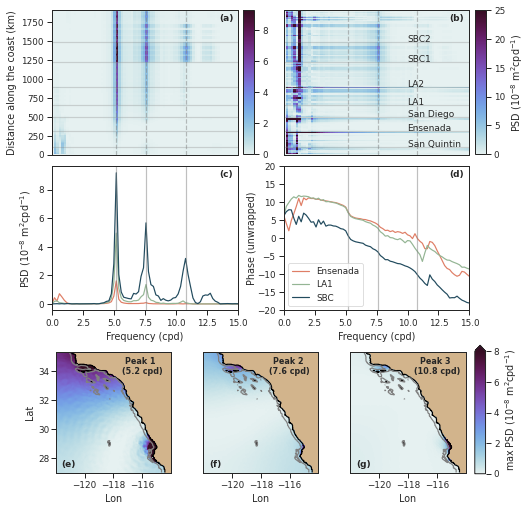

In [5]:
## === FIGURE ===
sns.set_style('ticks')
sns.set_context('paper')
cmap=cmo.cm.dense

fig = plt.figure(figsize=(7.48,8.5))
gs = gridspec.GridSpec(2, 1, hspace=0.2, height_ratios=(1,0.4))
gs0 = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[0],wspace=0.25, hspace=0.08)
gs1 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1])

ax1 = plt.subplot(gs0[0,0])
ax2 = plt.subplot(gs0[0,1])
ax3 = plt.subplot(gs0[1,0])
ax4 = plt.subplot(gs0[1,1])
ax5 = plt.subplot(gs1[0])
ax6 = plt.subplot(gs1[1])
ax7 = plt.subplot(gs1[2])

# Bay - no bay
ax1.set_ylabel('Distance from SVB along the coast (km)')
pc1 = ax1.pcolormesh(freq2,X2,1e8*psd2/(1e4*86400), cmap=cmap)
cbar_ax = fig.add_axes([0.48, 0.645, 0.02, 0.235]) 
cb = fig.colorbar(pc1,
                  cax=cbar_ax, orientation='vertical', 
                  format='%1.0f',
                  )
ax1.set_xlim(0,15)

# no bay
pc2 = ax2.pcolormesh(freq_noSVB,X2,1e8*psd_noSVB/(1e4*86400), cmap=cmap,vmin=0, vmax=25)
cbar_ax = fig.add_axes([0.91, 0.645, 0.02, 0.235]) 
cb = fig.colorbar(pc2,
                  cax=cbar_ax, orientation='vertical', 
                  format='%1.0f', label='PSD (10$^{-8}$ m$^2$cpd$^{-1}$)', pad=0,
                  )
ax2.set_xlim(0,15)

colors=[ "#df7e66", "#94b594", "#224b5e","#b75347",]

# Spectra and phase selected stations
for kk, col, lab in zip([150, 307, 440],colors, ['Ensenada','LA1','SBC']):
    ax3.plot(spec_data.Freq, 1E8*spec_data.psd_data[kk,:]/(1e4*86400),color=col, 
             label='%s %1.1f km' %(lab,X2[kk]))
    ax4.plot(spec_data.Freq, np.unwrap(spec_data.phase_data[kk,:]),
             color=col,label='%s' %(lab))

ax3.axvline(5.2, color='0.5', alpha=0.5)     
ax4.axvline(5.2, color='0.5', alpha=0.5)     
ax3.axvline(7.6, color='0.5', alpha=0.5)     
ax4.axvline(7.6, color='0.5', alpha=0.5)     
ax3.axvline(10.8, color='0.5', alpha=0.5)     
ax4.axvline(10.8, color='0.5', alpha=0.5)     

ax4.legend(loc='lower left',ncol=1)
ax3.set_xlim(0,15)
ax4.set_ylim(-20,20)
ax4.set_xlim(0,15)
ax3.set_xlabel('Frequency (cpd)')
ax4.set_xlabel('Frequency (cpd)')
ax3.set_ylabel('PSD (10$^{-8}$ m$^2$cpd$^{-1}$)')
ax4.set_ylabel('Phase (unwrapped)', labelpad=0)

# Reference lines
for km, lab in zip([101,313.7,500, 660, 900, 1231, 1492], ['San Quintin','Ensenada','San Diego','LA1','LA2','SBC1', 'SBC2']):
    ax1.axhline(km,color='0.5',alpha=0.3)
    ax2.text(10,km,lab, fontsize=9)
    ax2.axhline(km,color='0.5',alpha=0.3) 
 
# Labels, etc
ax1.set_ylabel('Distance along the coast (km)')
ax1.set_xticks([])
ax2.set_xticks([])
ax2.set_yticks([])

ax1.text(0.9,0.93,'(a)',fontweight='bold', fontsize=9, transform=ax1.transAxes)
ax2.text(0.89,0.93,'(b)',fontweight='bold', fontsize=9, transform=ax2.transAxes)
ax3.text(0.9,0.93,'(c)',fontweight='bold', fontsize=9, transform=ax3.transAxes)
ax4.text(0.89,0.93,'(d)',fontweight='bold', fontsize=9, transform=ax4.transAxes)

for ax in [ax1,ax2]:
    ax.axvline(5.2, color='0.5', linestyle='--',alpha=0.5)
    ax.axvline(7.6, color='0.5', linestyle='--',alpha=0.5)
    ax.axvline(10.8, color='0.5', linestyle='--',alpha=0.5)

## ----- spatial map of peak PSD ------
cmap =cmo.cm.dense
cmap2 =cmo.cm.amp

ax5.set_ylabel('Lat')
for ax in [ax5,ax6,ax7]:
    ax.set_xlabel('Lon')
for ax in [ax6,ax7]:
    ax.set_yticks([])

# - plot spatial structure of frequency peaks
ax5.set_facecolor('tan')
pc5 = ax5.pcolormesh(lons,lats, 1e8*sshData.p1_psd/(1e4*86400), cmap=cmap, vmin=0, vmax=8)
levels=np.arange(0,80,10)
ax5.contour(lons,lats,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax5.set_aspect(1)

ax6.set_facecolor('tan')
pc6 = ax6.pcolormesh(lons,lats, 1e8*sshData.p2_psd/(1e4*86400), cmap=cmap, vmin=0, vmax=8)
levels=np.arange(0,50,10)
ax6.contour(lons,lats,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax6.set_aspect(1)

ax7.set_facecolor('tan')
pc7 = ax7.pcolormesh(lons,lats, 1e8*sshData.p3_psd/(1e4*86400), cmap=cmap, vmin=0, vmax=8)
levels=np.arange(0,50,10)
ax7.contour(lons,lats,depth,levels=[0, 250], colors=['k','0.5','0.5','0.5','0.5','0.5'])
ax7.set_aspect(1)

cbar_ax2 = fig.add_axes([0.91, 0.123, 0.02, 0.21]) 
cb2 = fig.colorbar(pc5,cax=cbar_ax2, orientation='vertical', 
                  format='%1.0f', label='max PSD (10$^{-8}$ m$^2$cpd$^{-1}$)', pad=0,
                  extend='max')

ax5.text(0.75,0.82,'Peak 1 \n(5.2 cpd)',fontweight='bold', ha='center', fontsize=8, transform=ax5.transAxes)
ax6.text(0.75,0.82,'Peak 2 \n(7.6 cpd)',fontweight='bold', ha='center', fontsize=8, transform=ax6.transAxes)
ax7.text(0.75,0.82,'Peak 3 \n(10.8 cpd)',fontweight='bold', ha='center', fontsize=8, transform=ax7.transAxes)

ax5.text(0.05,0.05,'(e)',fontweight='bold', fontsize=9, transform=ax5.transAxes)
ax6.text(0.05,0.05,'(f)',fontweight='bold', fontsize=9, transform=ax6.transAxes)
ax7.text(0.05,0.05,'(g)',fontweight='bold',  fontsize=9, transform=ax7.transAxes)

for ax in [ax5,ax6,ax7]:
    ax.tick_params(axis='y', which='major', pad=1)

# save figure
#plt.savefig('figure08.png', dpi=500, bbox_inches='tight')